# submitted by Harsh Srivastava
# Roll - 117cs0755

## importing libraries

In [1]:
import numpy as np
%pylab inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


## define initial problem constants

In [2]:
num_units = 7
num_intervals = 4
population = 100
generations = 100
unit_capacity = [20, 25, 35, 40, 15, 15, 10]
num_int_unit = [2, 2, 1, 1, 1, 1, 1]
total_installed_capacity = 150
max_load_interval = [80, 90, 65, 70]
pc = 0.7
pm = 0.00001
cons = -60

## creating gene pool for each chromosome

In [3]:
gene_pool = [[[1, 1, 0, 0], [0, 1, 1, 0], [0, 0, 1, 1]], 
            [[1, 1, 0, 0], [0, 1, 1, 0], [0, 0, 1, 1]], 
            [[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]],
            [[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]],
            [[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]],
            [[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]],
            [[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]]]
print(gene_pool)

[[[1, 1, 0, 0], [0, 1, 1, 0], [0, 0, 1, 1]], [[1, 1, 0, 0], [0, 1, 1, 0], [0, 0, 1, 1]], [[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]], [[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]], [[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]], [[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]], [[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]]]


## defining a fitness function

In [4]:
def fitness(chromosome) :
    chrom = np.array(chromosome)
    #print(chrom)
    u_cap = unit_capacity
    u_cap = np.array(u_cap)
    #print(u_cap)
    fit_unit = np.dot(chrom.T, u_cap)
    #print(fit_unit)
    res_pow = total_installed_capacity - fit_unit - np.array(max_load_interval)
    #print(res_pow)
    #print("\n")
    res = max(res_pow)
    return res

## testing fitness function for a random chromosome

In [5]:
print(fitness([[0, 1, 1, 0], [0, 0, 1, 1], [0, 0, 0, 1], [1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [1, 0, 0, 0]]))

25


## function for cross over

In [6]:
def cross_over(parent1, parent2) :
    
    # selecting a random point for exchange of genes
    partition = 2#np.random.randint(0, num_units - 1)
    for i in range(partition + 1, num_units) :
        # exchanging genes
        temp = parent1[i]
        parent1[i] = parent2[i]
        parent2[i] = temp
    return parent1, parent2

## testing cross over for random parents

In [7]:
cross_over([[0, 1, 1, 0], [0, 0, 1, 1], [0, 0, 0, 1], [1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [1, 0, 0, 0]],
           [[0, 1, 1, 0], [0, 1, 1, 0], [0, 1, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [0, 0, 0, 1], [1, 0, 0, 0]])

([[0, 1, 1, 0],
  [0, 0, 1, 1],
  [0, 0, 0, 1],
  [1, 0, 0, 0],
  [1, 0, 0, 0],
  [0, 0, 0, 1],
  [1, 0, 0, 0]],
 [[0, 1, 1, 0],
  [0, 1, 1, 0],
  [0, 1, 0, 0],
  [1, 0, 0, 0],
  [0, 1, 0, 0],
  [0, 0, 1, 0],
  [1, 0, 0, 0]])

## function for mutation

In [8]:
def mutation(chromosome) :
    # selecting a random gene from the chromosome
    rand_gene = np.random.randint(0, num_units)
    # replacing the gene with a random gene from the gene pool
    chromosome[rand_gene] = gene_pool[rand_gene][np.random.randint(0, num_intervals - num_int_unit[rand_gene] + 1)]
    return chromosome

## testing mutation for a random chromosome

In [9]:
mutation([[0, 1, 1, 0], [0, 0, 1, 1], [0, 0, 0, 1], [1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [1, 0, 0, 0]])

[[0, 1, 1, 0],
 [0, 0, 1, 1],
 [0, 0, 0, 1],
 [1, 0, 0, 0],
 [0, 1, 0, 0],
 [0, 0, 1, 0],
 [1, 0, 0, 0]]

## generating an initial population

In [10]:
chrom_pop_init = []
for i in range(population) :
    chrom = []
    for j in range(num_units) :
        x = np.random.randint(0, num_intervals - num_int_unit[j] + 1)
        #print(x)
        chrom.append(gene_pool[j][x])
    chrom_pop_init.append(chrom)
    
#print(chrom_pop_init)
print(np.array(chrom_pop_init).shape)

(100, 7, 4)


## function for selecting random chromosomes based on fitness

In [11]:
def random_chromosome(fitnesses, chrom_pop) :
    f = fitnesses
#     for k in range(len(f)) :
#         if f[k] < 0 :
#             f[k] = f[k] * 999 * -1
    c = [x for _,x in sorted(zip(f,chrom_pop))]
    f.sort()
    i1 = np.random.randint(len(f) // 2, len(f))
    i2 = np.random.randint(len(f) // 2, len(f))
    return c[i1], c[i2]

## implementation of genetic algo

In [12]:
gen_val = []
min_fit = [cons] * generations

chrom_pop = chrom_pop_init
for i in range(generations) :
    fitnesses = []
    for j in range(population) :
        fitnesses.append(fitness(chrom_pop[j]))
#     min_fit.append(min(fitnesses))
    min_fit[i] += min(fitnesses)
    gen_val.append(i + 1)
    
    new_pop = []
    for j in range(population) :
        parent1, parent2 = random_chromosome(fitnesses, chrom_pop)
        parent1, parent2 = cross_over(parent1, parent2)
        if random.random() < pm :
            parent1 = mutation(parent1)
        if random.random() < pm :
            parent2 = mutation(parent2)
        new_pop.append(parent1)
        new_pop.append(parent2)
        if len(new_pop) == population :
            break
    chrom_pop = new_pop

## plotting fitness vs generation

Plotting fitness vs generation


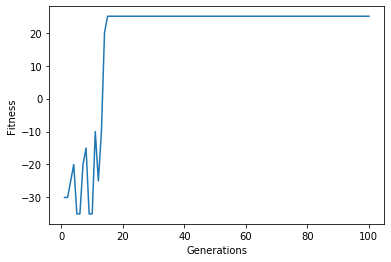

In [13]:
print("Plotting fitness vs generation")    
plt.plot(gen_val, min_fit)
plt.xlabel('Generations')
plt.ylabel('Fitness')

plt.show()

## we can see that the fitness is reaching desired values with increasing generations